In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import cufflinks as cf
import folium
from plotly .offline import download_plotlyjs,init_notebook_mode,plot,iplot
plt.rcParams['figure.figsize']=20,15

In [15]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

file =r'C:\Users\yash\Desktop\covid-19.xlsx'
df=pd.read_excel(file,usecols=['State/UT','Confirmed','Recovered','Deceased'],inplace=True)
df

In [150]:
df.dtypes

State/UT     object
Confirmed     int64
Recovered     int64
Deceased      int64
dtype: object

In [151]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State/UT   36 non-null     object
 1   Confirmed  36 non-null     int64 
 2   Recovered  36 non-null     int64 
 3   Deceased   36 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [152]:
#df[['Confirmed','Recovered']].astype('int')


In [153]:
df.dtypes

State/UT     object
Confirmed     int64
Recovered     int64
Deceased      int64
dtype: object

In [154]:
df['Active']=df['Confirmed']-df['Recovered']+df['Deceased']
df

,State/UT,Confirmed,Recovered,Deceased,Active
0,Maharashtra,167843,88960,7610,86493
1,Tamil Nadu,86224,47749,1141,39616
2,Delhi,85161,56235,2680,31606
3,Gujarat,32023,23248,1828,10603
4,Uttar Pradesh,22828,15506,672,7994
5,West Bengal,17907,11719,653,6841
6,Rajasthan,17754,13948,409,4215
7,Telangana,15394,5582,253,10065
8,Andhra Pradesh,14595,6511,187,8271
9,Karnataka,14295,7685,226,6836


In [155]:
 total_cases=df.Active.sum()
print('total_cases  in india is',total_cases)

total_cases  in india is 247500


In [156]:
df.style.background_gradient(cmap ='Reds')

,State/UT,Confirmed,Recovered,Deceased,Active
0,Maharashtra,167843,88960,7610,86493
1,Tamil Nadu,86224,47749,1141,39616
2,Delhi,85161,56235,2680,31606
3,Gujarat,32023,23248,1828,10603
4,Uttar Pradesh,22828,15506,672,7994
5,West Bengal,17907,11719,653,6841
6,Rajasthan,17754,13948,409,4215
7,Telangana,15394,5582,253,10065
8,Andhra Pradesh,14595,6511,187,8271
9,Karnataka,14295,7685,226,6836


In [157]:
total_active_cases=df.groupby('State/UT')['Active'].sum().to_frame().sort_values('Active',ascending=False)
total_active_cases

,Active
State/UT,
Maharashtra,86493
Tamil Nadu,39616
Delhi,31606
Gujarat,10603
Telangana,10065
Andhra Pradesh,8271
Uttar Pradesh,7994
Unassigned,7004
West Bengal,6841


In [158]:
total_active_cases.style.background_gradient(cmap='Reds')

,Active
State/UT,
Maharashtra,86493
Tamil Nadu,39616
Delhi,31606
Gujarat,10603
Telangana,10065
Andhra Pradesh,8271
Uttar Pradesh,7994
Unassigned,7004
West Bengal,6841


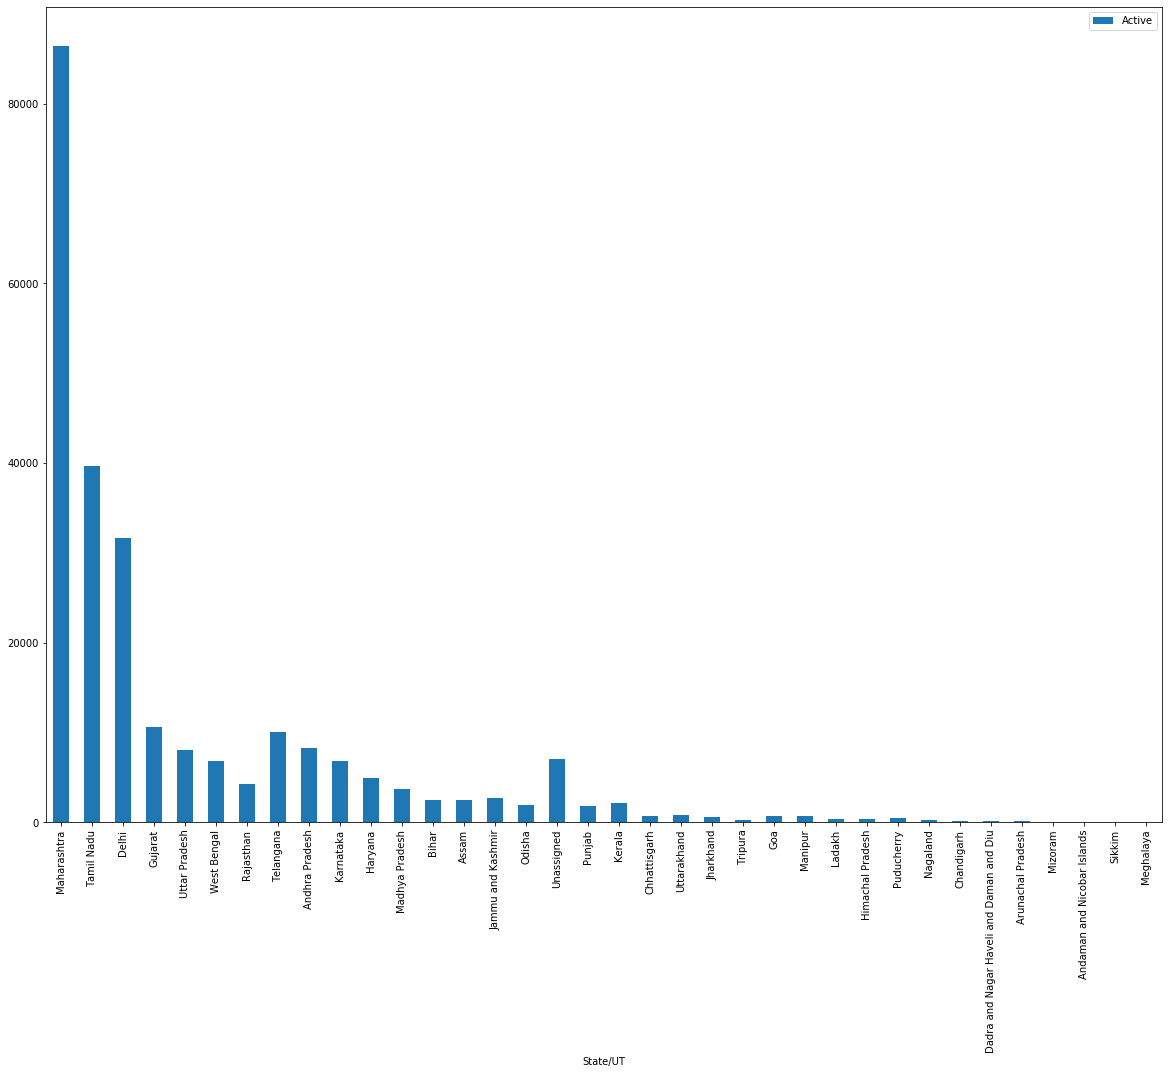

In [159]:
df.plot(kind='bar',x='State/UT',y='Active')#pandas vis.
df.iplot(kind='bar',x='State/UT',y='Active')

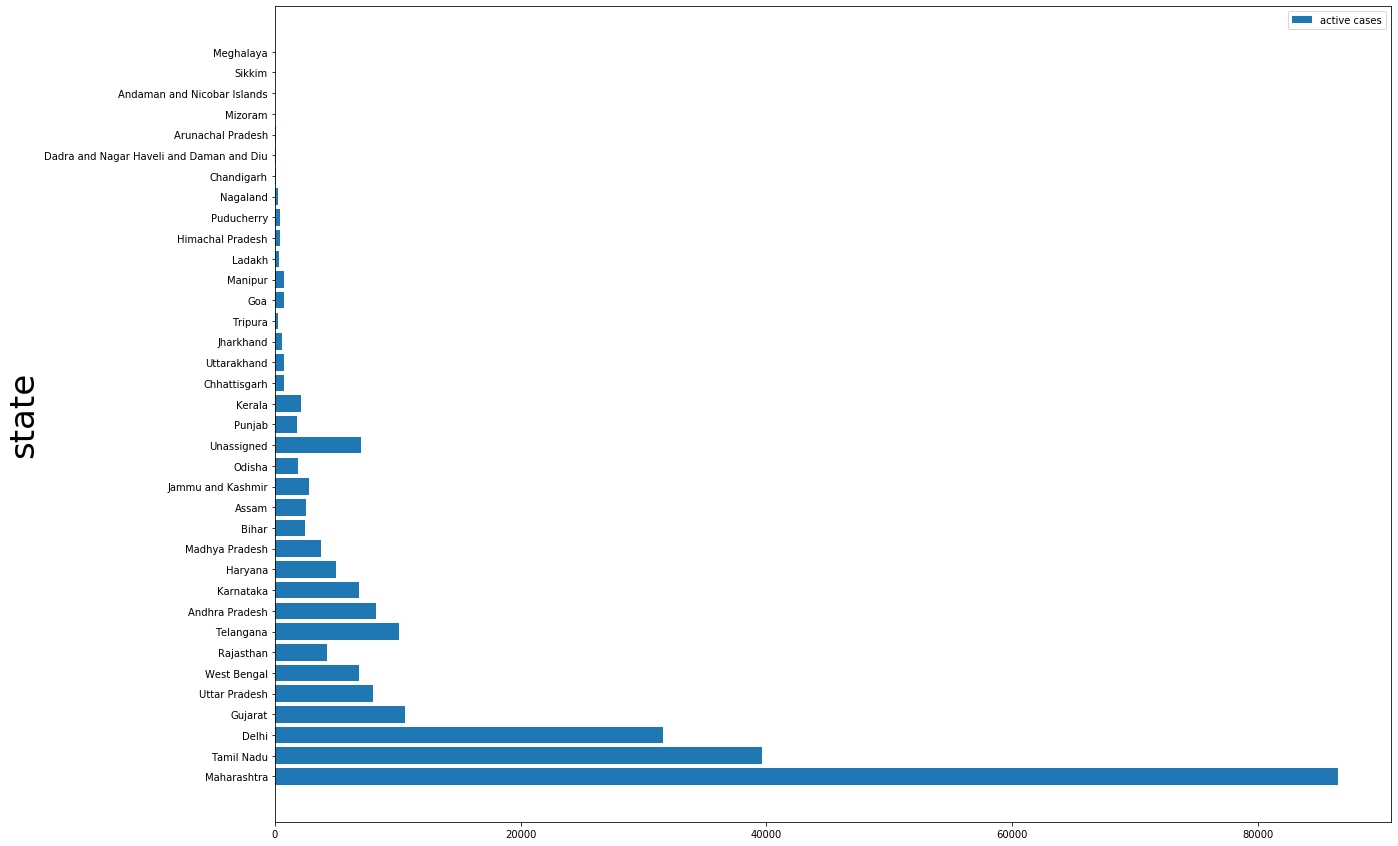

In [160]:
#matplotlib visualization
plt.barh(df['State/UT'],df['Active'],label='active cases')
plt.legend()

plt.ylabel('state',fontsize=34)
plt.show()

In [161]:
px.bar(df,x='State/UT',y='Active')#plotly vis.

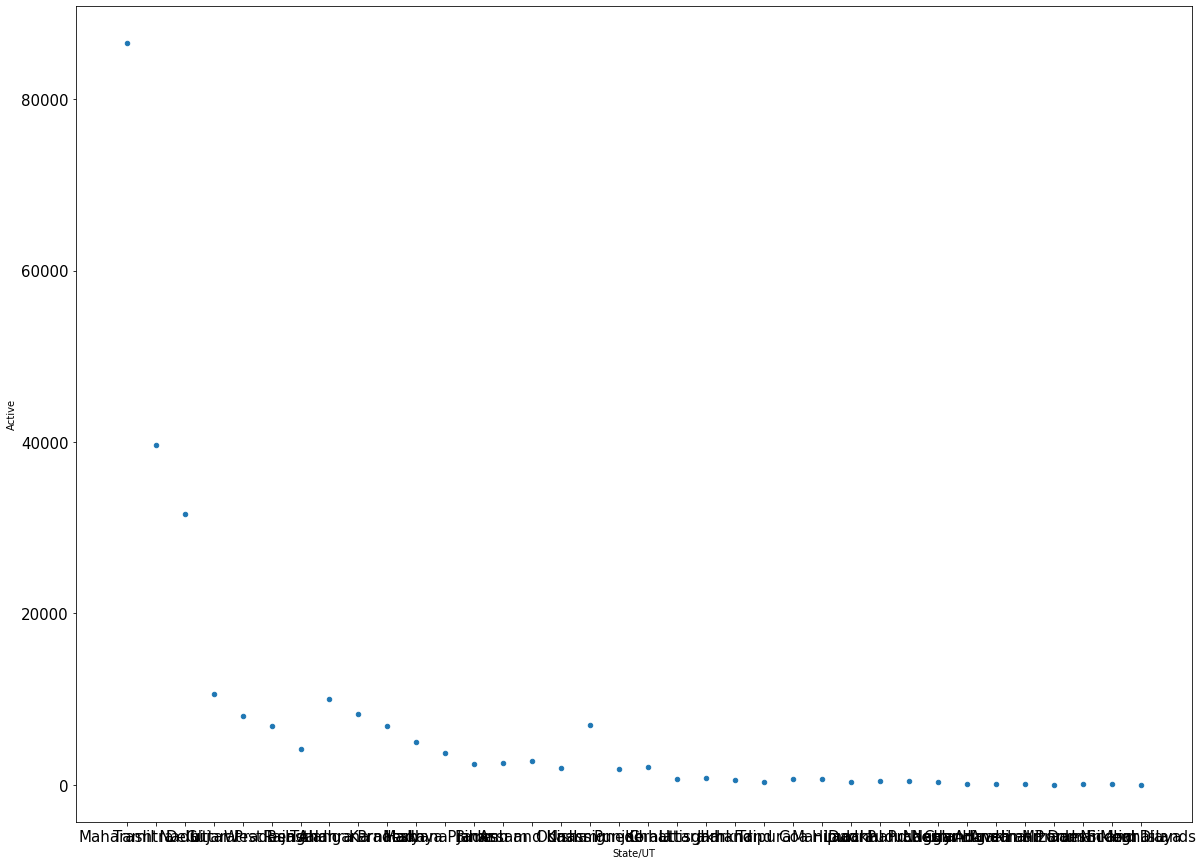

In [162]:
#pandas scatter plot
df.plot(kind='scatter',x='State/UT',y='Active',fontsize=15 )

Text(0.5, 0, 'state/UT')

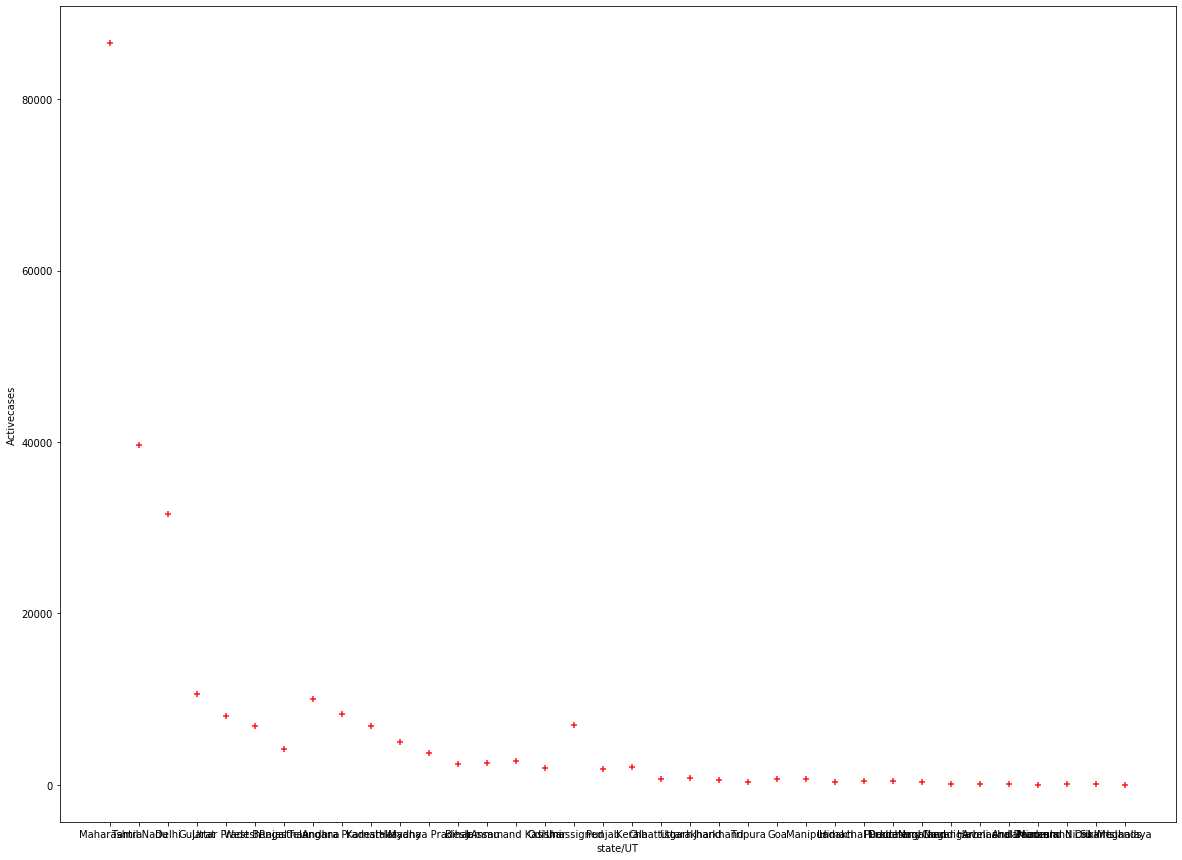

In [163]:
#matplotlib scatter
plt.scatter(x='State/UT',y='Active' ,data=df,marker='+',alpha=0.9,color='red')
plt.ylabel('Activecases')
plt.xlabel('state/UT')

In [164]:
df.iplot(kind='scatter',x='State/UT',y='Active',fontsize=15 ,mode='markers+lines',title='Total Active Cases ',xTitle='state',yTitle='no. of cases',colors='red',size=10)

In [165]:
px.scatter(df,x='State/UT',y='Active',symbol=df['Deceased'],color=df['State/UT'])

In [166]:
df.columns

Index(['State/UT', 'Confirmed', 'Recovered', 'Deceased', 'Active'], dtype='object')

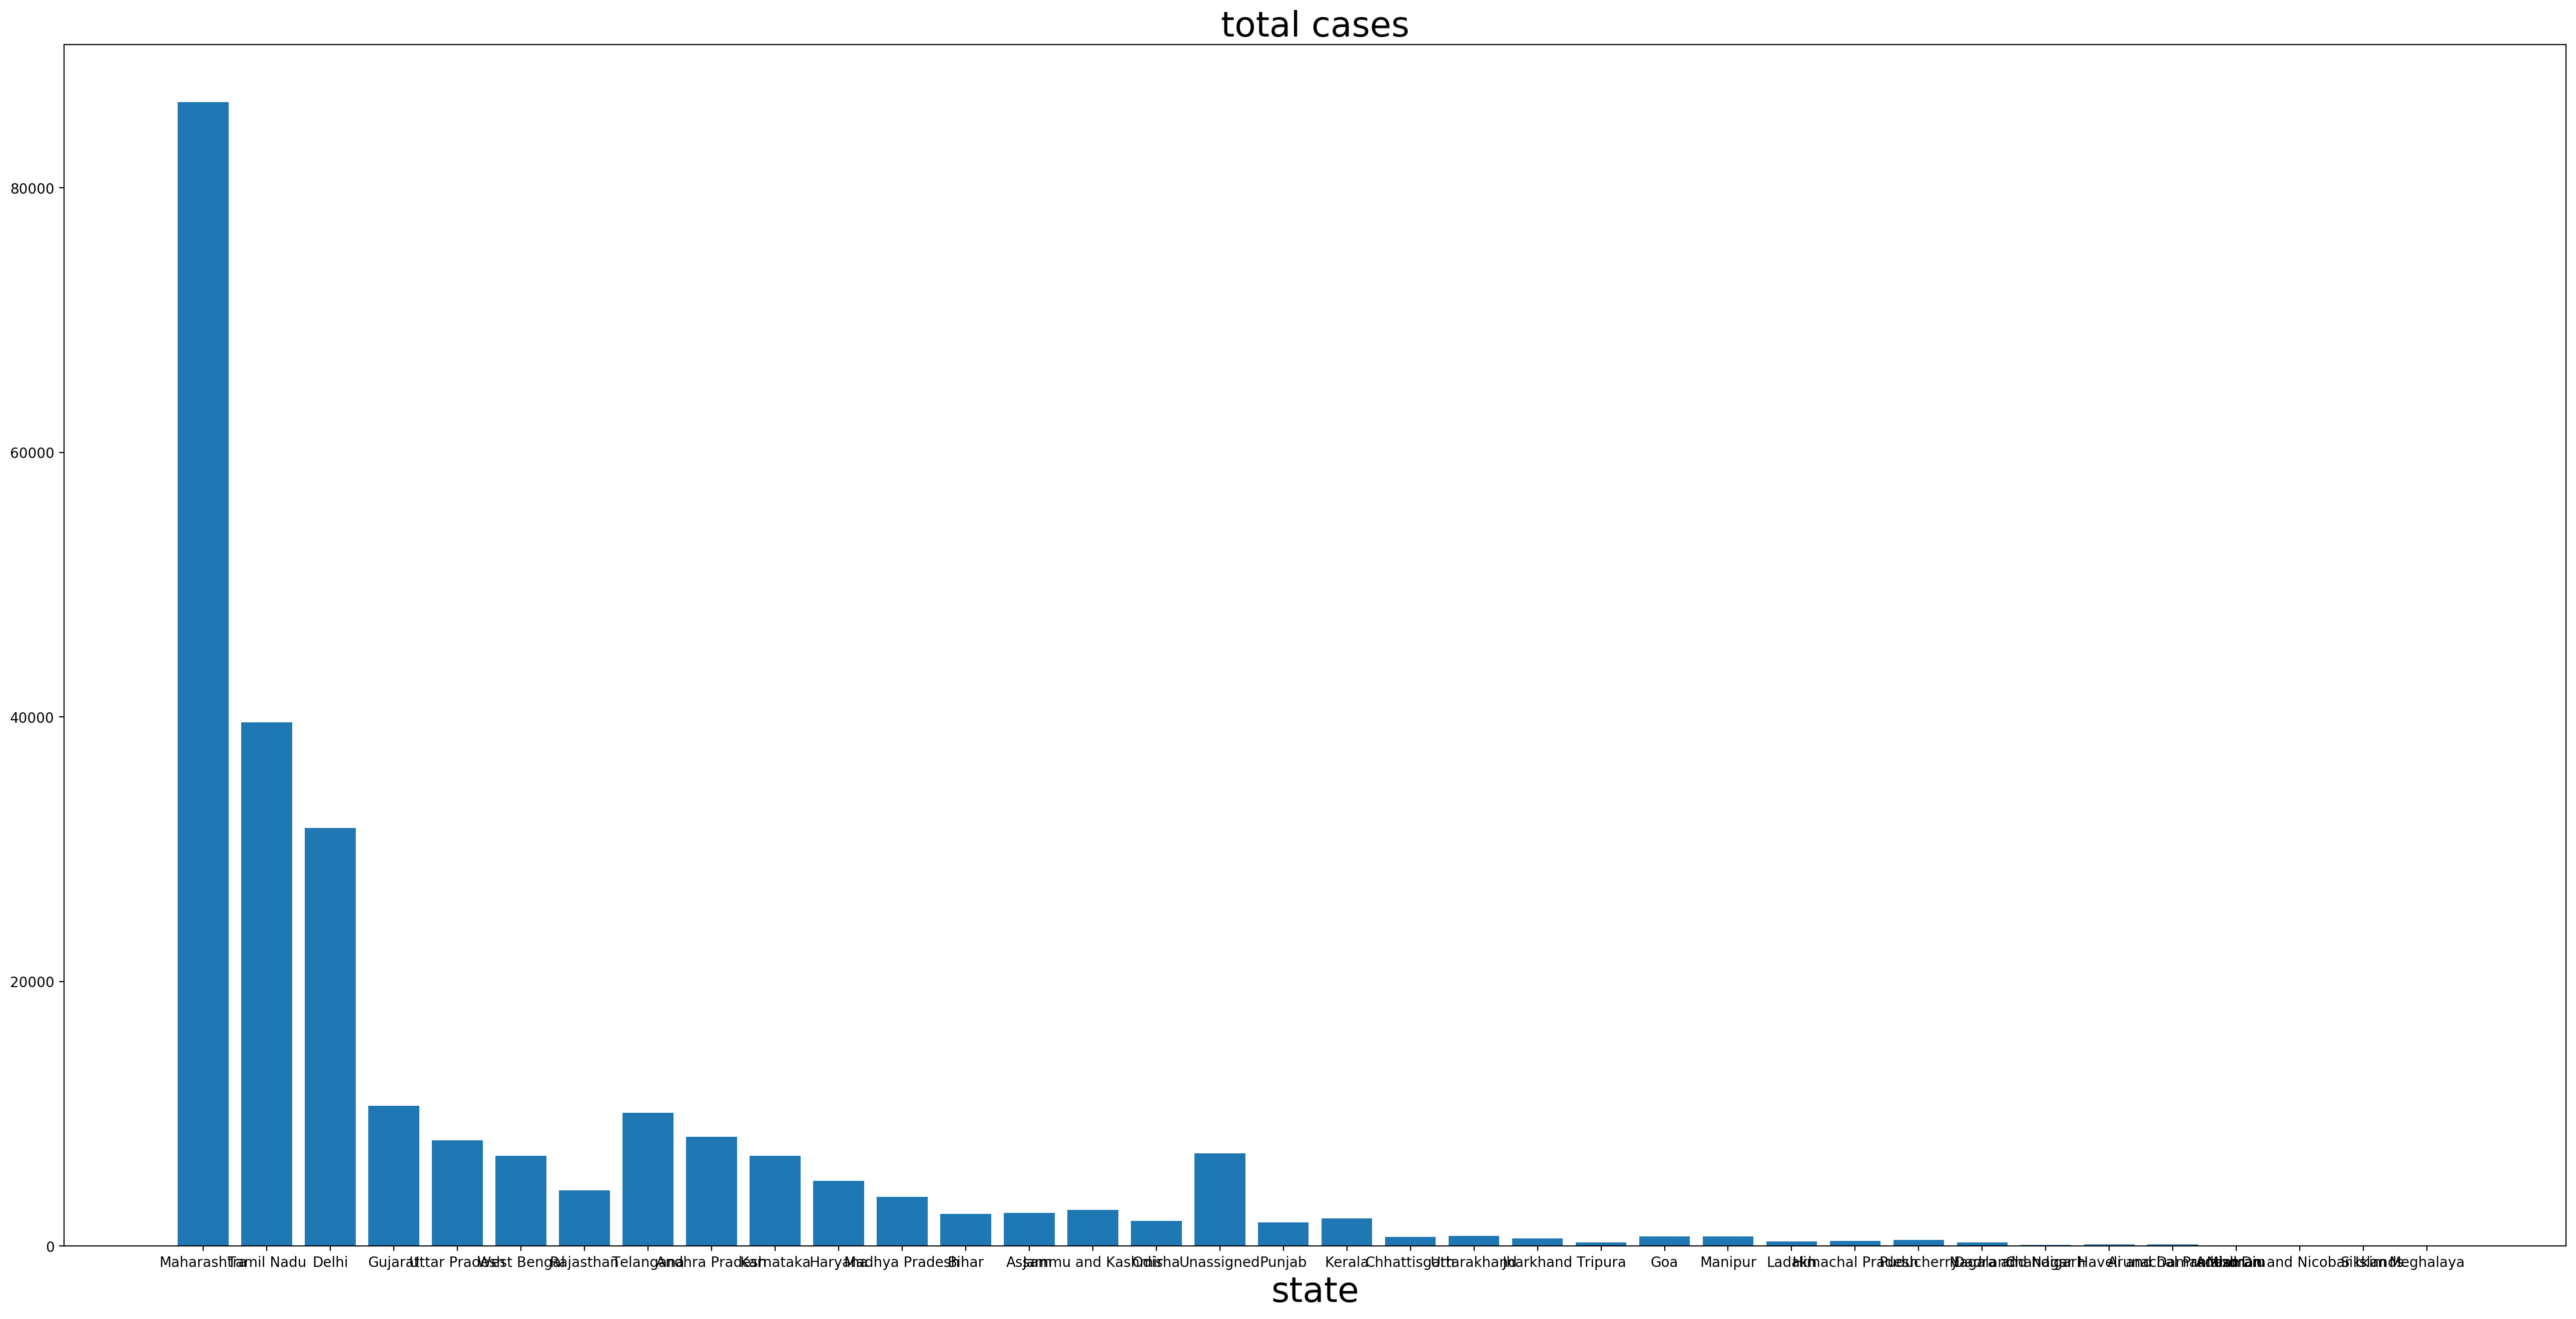

In [167]:
fig=plt.figure(figsize=(25,12),dpi=200)
ax=fig.add_axes([0,0,1,1])
ax.bar(df['State/UT'],df['Active'] )
plt.title('total cases',size=25)
ax.set_xlabel('state',size=25)
plt.show()

In [168]:
file=r'C:\Users\yash\Desktop\LON NAD LAT.xlsx'
india_cord=pd.read_excel(file,inplace=True,usecols=['State/UT','LATITUDE','LONGITUDE'])
india_cord

,State/UT,LATITUDE,LONGITUDE
0,Maharashtra,12.920000,79.150000
1,Telangana,17.123184,79.208824
2,Madhya Pradesh,21.300000,76.130000
3,Haryana,28.450000,77.019000
4,Chhatisgarh,22.090000,82.159000
5,Tamil Nadu,19.250000,73.160000
6,Tripura,23.835000,91.279000
7,Karnataka,12.576000,76.919000
8,Kerela,8.900230,76.567000
9,Uttar Pradesh,27.599000,78.050000


In [169]:
df_full=pd.merge(df,india_cord,on='State/UT',how='inner')
df_full

,State/UT,Confirmed,Recovered,Deceased,Active,LATITUDE,LONGITUDE
0,Maharashtra,167843,88960,7610,86493,12.920000,79.150000
1,Delhi,85161,56235,2680,31606,28.696000,77.230000
2,Uttar Pradesh,22828,15506,672,7994,27.599000,78.050000
3,West Bengal,17907,11719,653,6841,22.580000,88.329000
4,Rajasthan,17754,13948,409,4215,26.445000,74.637000
5,Telangana,15394,5582,253,10065,17.123184,79.208824
6,Andhra Pradesh,14595,6511,187,8271,14.750000,78.570000
7,Karnataka,14295,7685,226,6836,12.576000,76.919000
8,Haryana,14210,9502,232,4940,28.450000,77.019000
9,Madhya Pradesh,13370,10199,564,3735,21.300000,76.130000


In [37]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['LATITUDE'],df_full['LONGITUDE'],df_full['Confirmed'],df_full['State/UT']):
    folium.CircleMarker([lat,long],popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='white',fill_opacity=0.3).add_to(map)
map    

In [38]:
#how corona virus is rising globally


In [39]:

dbd_India=pd.read_excel(r"C:\Users\yash\Downloads\per_day_cases.xlsx",parse_dates=True,sheet_name="India",usecols=['Date','Total Cases','New Cases'])

In [40]:
dbd_India

,Date,New Cases,Total Cases
0,2020-01-30,1.0,1.0
1,2020-01-31,1.0,2.0
2,2020-02-01,1.0,3.0
3,2020-02-02,2.0,4.0
4,2020-02-03,3.0,6.0
...,...,...,...
195,2020-08-12,61989.0,2199545.0
196,2020-08-13,62999.0,2247657.0
197,2020-08-14,62767.0,2346757.0
198,2020-08-15,63989.0,2365757.0


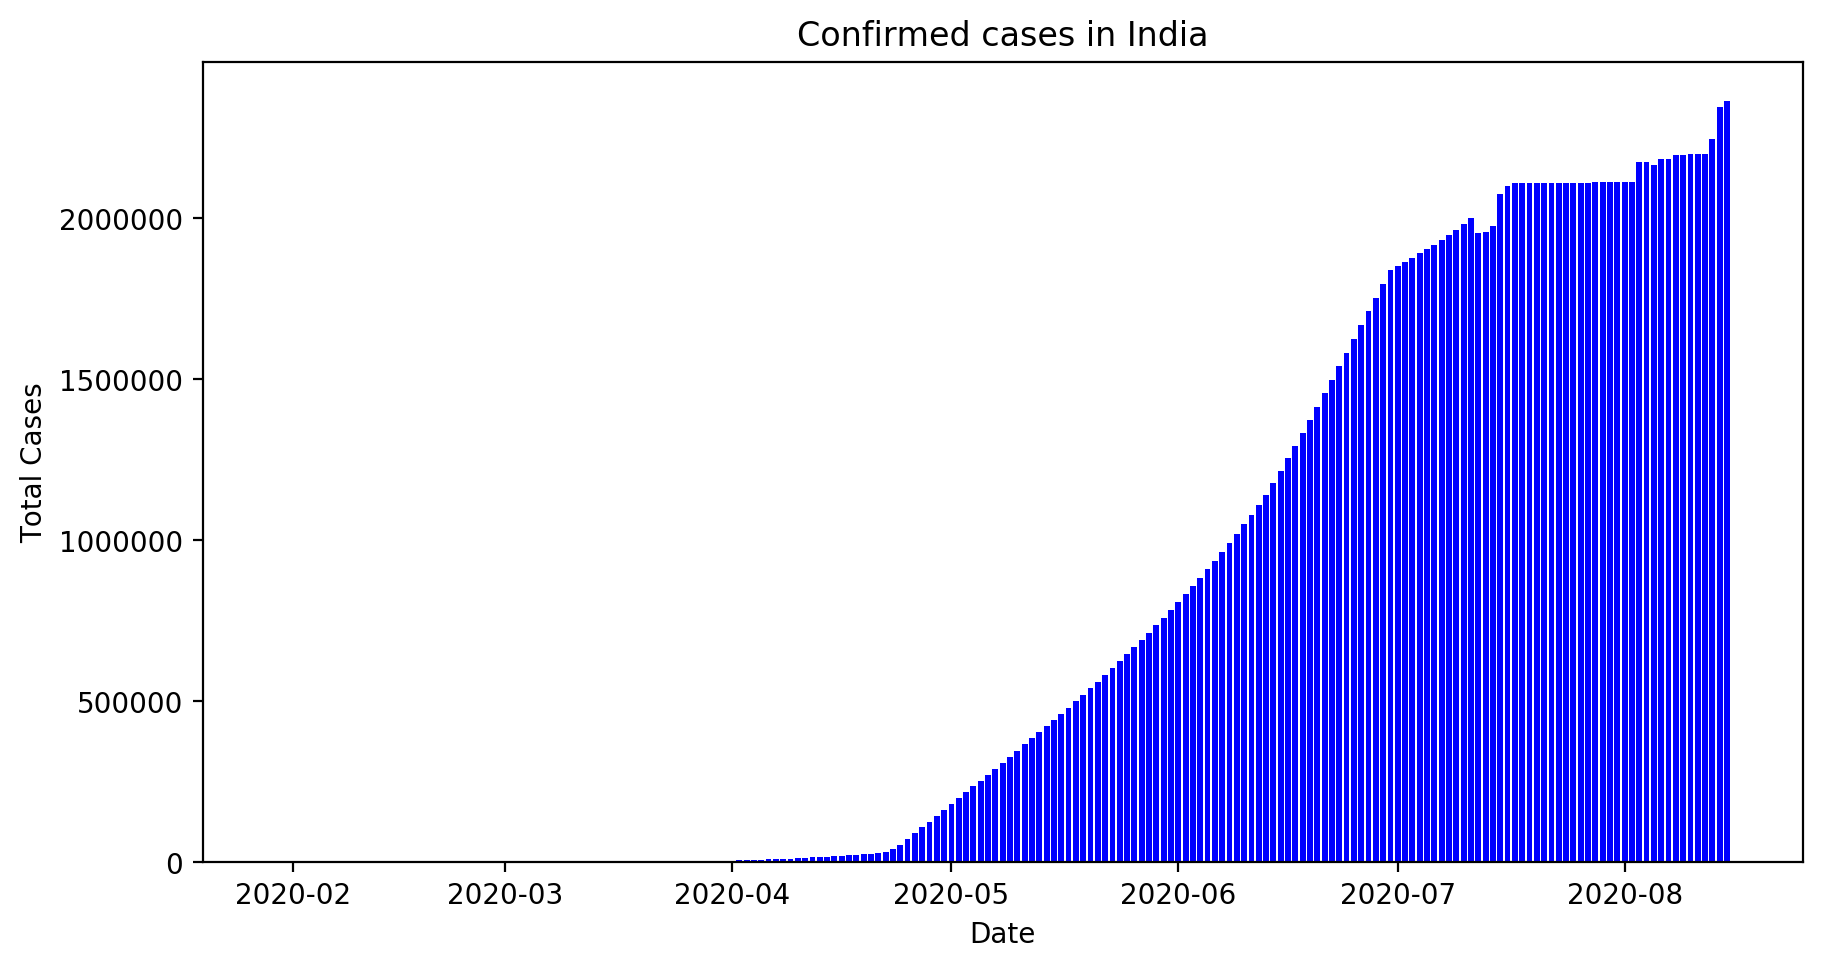

In [41]:
#Matplotlib
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_India["Date"],dbd_India["Total Cases"],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()


#plotly Express

fig=px.bar(dbd_India,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()

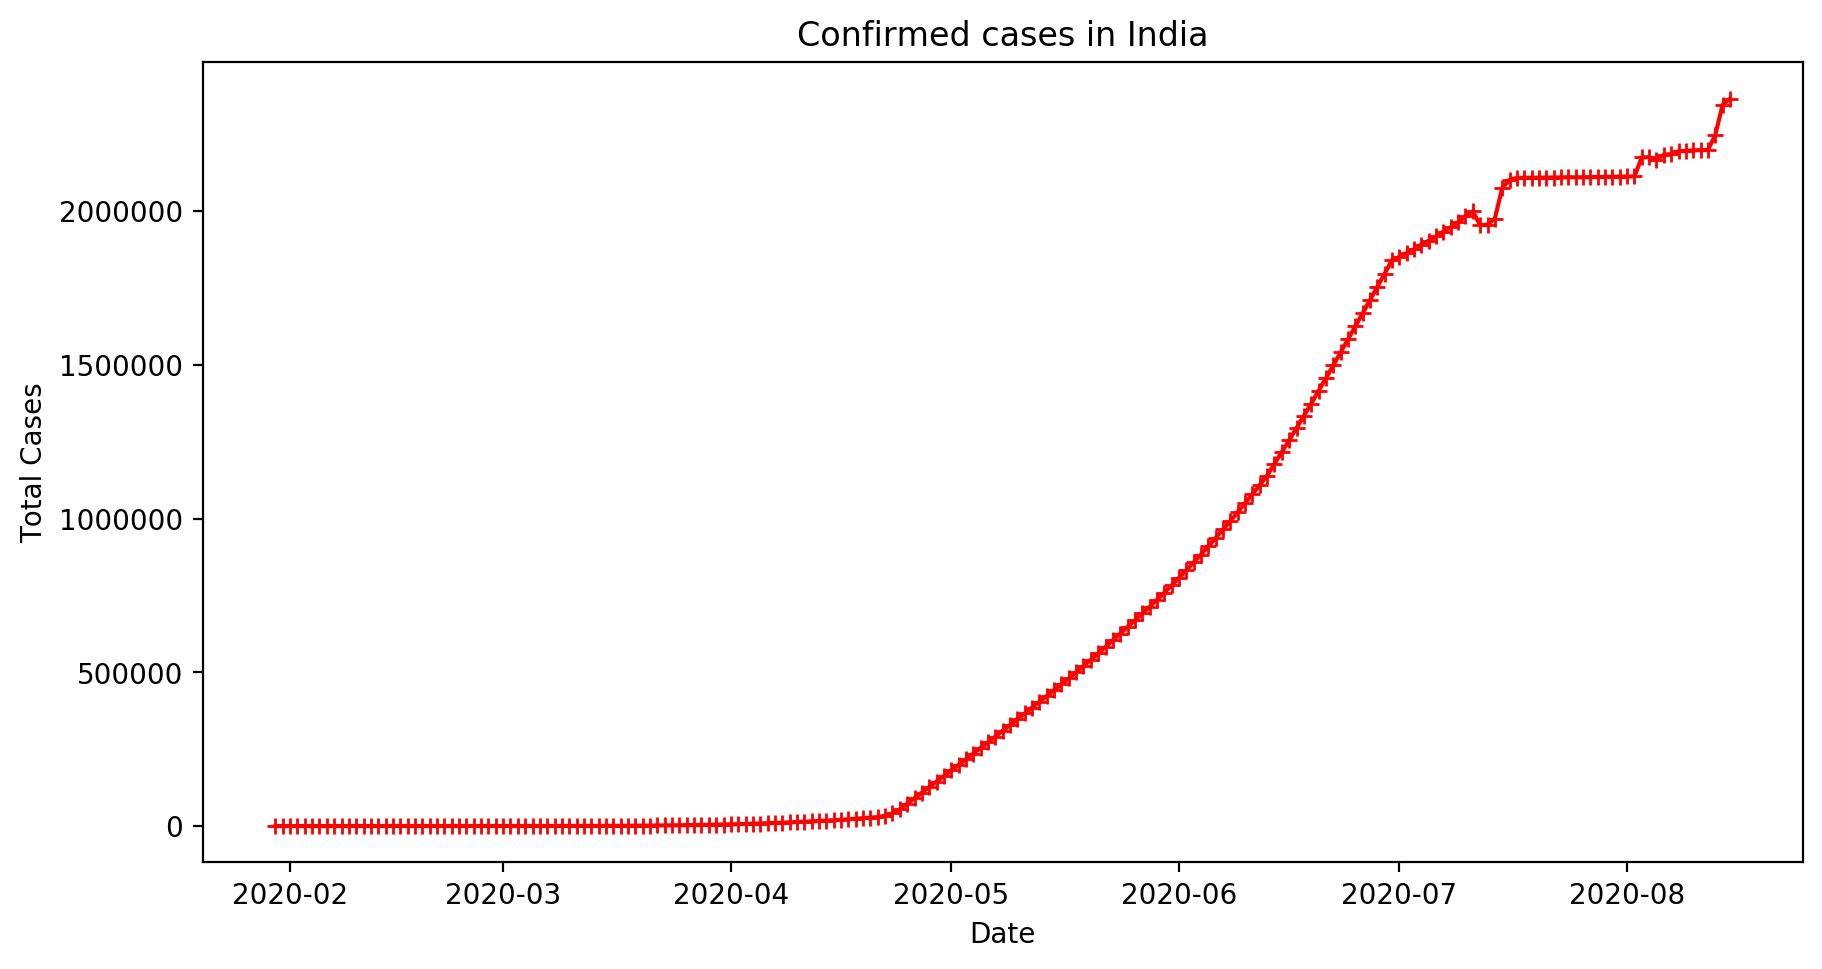

In [42]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(dbd_India["Date"],dbd_India["Total Cases"],color='red',marker='+')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()


In [43]:
#plotly Express

fig=px.scatter(dbd_India,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()

In [44]:

#Plotly
dbd_India.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')

In [45]:
#fig=go.figure()
#fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],mode='lines+markers'))

In [60]:
df_world=pd.read_excel(r'C:\Users\yash\Desktop\WORLDREPORT.xlsx')

In [61]:
df_world

,COUNTRY,CASES,DEATH,REGION
0,United States,5567765,173139,North America
1,Brazil,3340197,107879,South America
2,India,2651290,51079,Asia
3,Russia,927745,15740,Europe
4,South Africa,587345,11839,Africa
...,...,...,...,...
209,Western Sahara,10,1,Africa
210,MS Zaandam,9,2,NaN
211,British Virgin Islands,9,1,North America
212,Saint Pierre & Miquelon,4,0,North America


In [68]:
df_world.query('COUNTRY=="Anguilla"')

,COUNTRY,CASES,DEATH,REGION
213,Anguilla,3,0,North America


In [76]:
world=df_world['CASES'].sum()
print( world)

21852024


In [78]:
df_world['DEATH'].sum()

773586

In [131]:
asia=df_world.query('REGION=="Asia"')

In [170]:
asia

,COUNTRY,CASES,DEATH,REGION
2,India,2651290,51079,Asia
10,Iran,345450,19804,Asia
12,Saudi Arabia,298542,3408,Asia
14,Pakistan,289215,6175,Asia
15,Bangladesh,279144,3694,Asia
17,Turkey,249309,5974,Asia
20,Iraq,176931,5860,Asia
21,Philippines,164474,2681,Asia
22,Indonesia,141370,6207,Asia
24,Qatar,115080,193,Asia


In [171]:
asia.iplot(kind='bar',x='COUNTRY',y='CASES',color='red')

In [136]:

confirmed=df.groupby('REGION').sum()['CASES'].reset_index()
death=df.groupby('REGION').sum()['DEATH'].reset_index()
print(confirmed)
print(death)

              REGION    CASES
0             Africa  1123493
1               Asia  5677656
2  Australia/Oceania    25729
3             Europe  3174042
4      North America  6566907
5      South America  5284188
              REGION   DEATH
0             Africa   25695
1               Asia  120512
2  Australia/Oceania     447
3             Europe  203264
4      North America  247546
5      South America  176120


In [138]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['REGION'],y=confirmed['CASES'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x=death['REGION'],y=death['DEATH'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
#fig.add_trace(go.Scatter(x=rec['Date'],y=rec['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))